# Simulação da Disponibilidade de Serviços em um Sistema Distribuído

---

## Formula para calcular disponibilidade de um serviço

A formula é definida em termos dos seguintes parâmetros:
    
    n - número de servidores(n > 0)

    k - número mínimo de servidores disponíveis necessários para o serviço ser acessado de forma consistente (0 < k <= n)

    p - probabilidade de cada servidor estar disponível em um dado instante (0 <= p <= 1)


$$
\sum_{i=k}^n \binom{n}{i} \times p^i \times (1-p)^{n - i}
$$

---

## Simulação Estocástica

### Pacotes necessários

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

### Definição das Funções

In [25]:
def servidor(p: float) -> bool:
    return 1 if random.random() >= p else 0

In [26]:
servidor(0.5)

0

In [27]:
def cluster(n: int, p: float) -> bool:
    return [servidor(p) for _ in range(n)]

In [28]:
cluster(10, 0.5)

[0, 1, 1, 0, 1, 1, 0, 1, 0, 1]

In [29]:
def cluster_check(k: int, n: int, p: float) -> bool:
    return 1 if sum(cluster(n, p)) >= k else 0

In [30]:
cluster_check(1, 10, 0.5)

1

In [31]:
def monte_carlo_cluster(k, n, p, iters = 1_000):
    return np.mean([cluster_check(k, n, p) for _ in range(iters)])

In [32]:
monte_carlo_cluster(1, 10, 0.5)

np.float64(1.0)

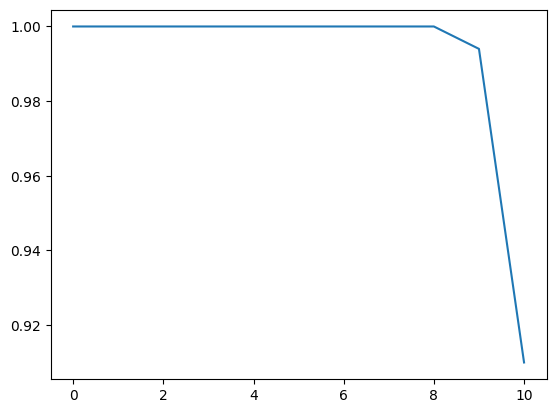

In [155]:
p = 0.01
n = 10
values = [monte_carlo_cluster(k, n, p) for k in range(n + 1)]
plt.plot(values)

In [16]:
def binomial(n: int, k : int)->float:
    return np.prod(range(1, n+1))/(np.prod(range(1, k+1)) * (np.prod(range(1, (n - k) + 1))))

def binomial_prob(n, k, p):
    array = np.arange(k, n+1)
    func = np.vectorize(lambda i: binomial(n, i) * (p**i) * ((1 - p) ** (n - i)))
    return sum(func(array))


print(binomial_prob(10, 10, 0.5))

0.0009765625


In [34]:
print(monte_carlo_cluster(5, 10, 0.5, 10))
print(binomial_prob(10, 5, 0.5))

0.8
0.623046875


### Para os casos extremos onde k = 1 (operação de consulta) e k = n (operação de atualização)

[ 1  2  3  4  5  6  7  8  9 10]


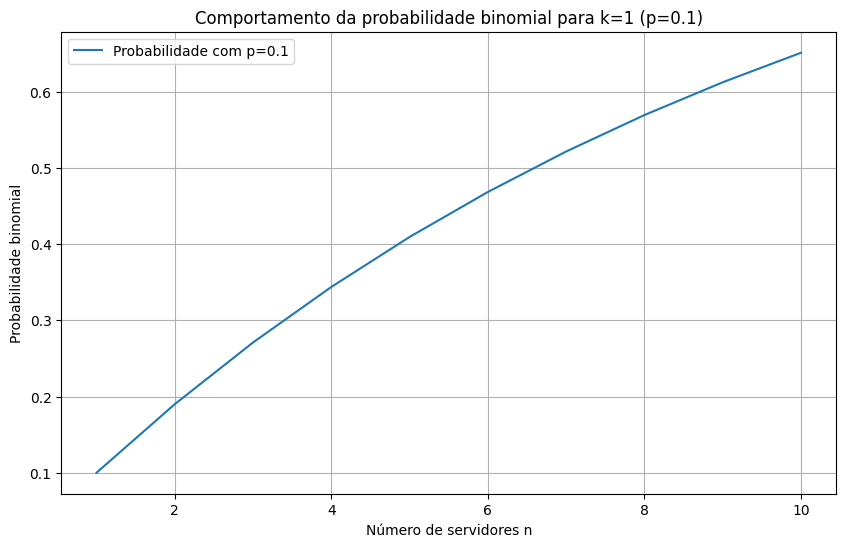

In [38]:
# de n = 1 até 10000

# caso k = 1
def one_k(n_max, p):
    n_values = np.arange(1, n_max + 1)
    print(n_values)
    prob_values = [binomial_prob(n, 1, p) for n in n_values]

    # Plotando o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, prob_values, label=f'Probabilidade com p={p}')
    plt.xlabel('Número de servidores n')
    plt.ylabel('Probabilidade binomial')
    plt.title(f'Comportamento da probabilidade binomial para k=1 (p={p})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Testando a função para n de 1 até 10000 e p = 0.5
one_k(10, 0.1)

[ 1  2  3  4  5  6  7  8  9 10]


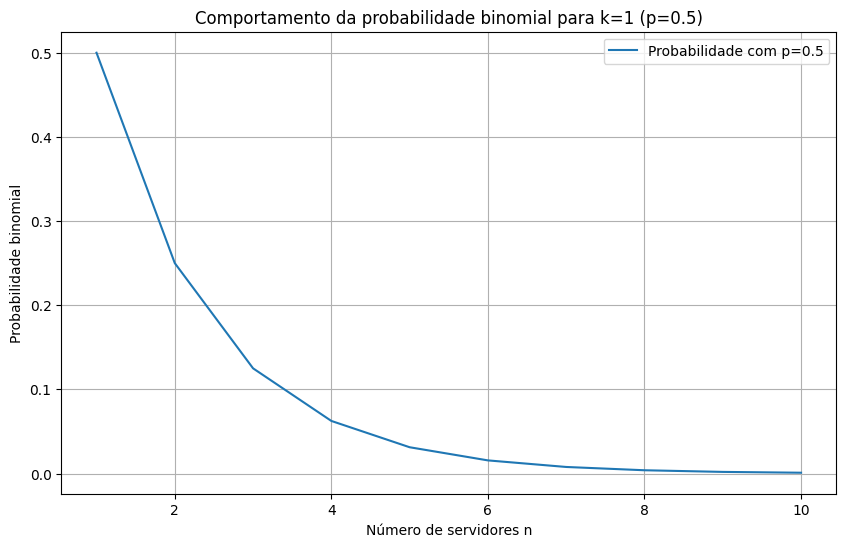

In [39]:
# de n = 1 até 10000

# caso k = n
def n_k(n_max, p):
    n_values = np.arange(1, n_max + 1)
    print(n_values)
    prob_values = [binomial_prob(n, n, p) for n in n_values]

    # Plotando o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, prob_values, label=f'Probabilidade com p={p}')
    plt.xlabel('Número de servidores n')
    plt.ylabel('Probabilidade binomial')
    plt.title(f'Comportamento da probabilidade binomial para k=1 (p={p})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Testando a função para n de 1 até 10000 e p = 0.5
n_k(10, 0.5)

In [2]:
from src.classes.visualize import SimulatorVisualizer
from src.classes.simulator import Simulator, Recorte

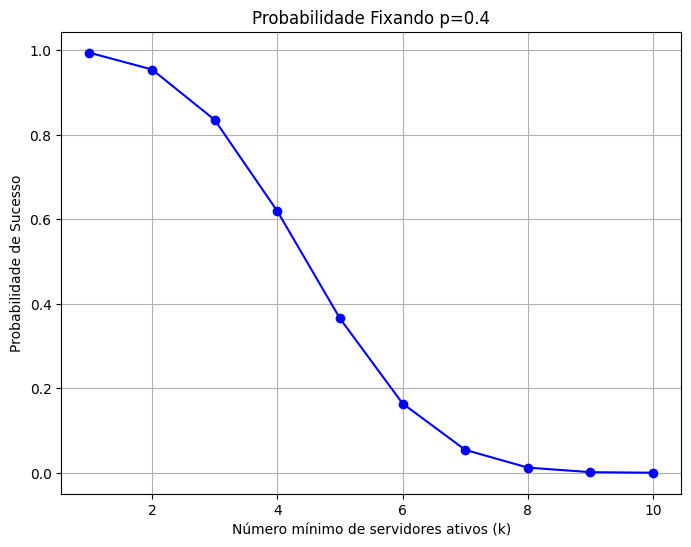

In [ ]:

op = Simulator(10, "1-10", "100-1000", step_p=100)
visualize = SimulatorVisualizer(op)

visualize.plot_fixed_availability_curve(value_fix=0.4,flag=True)

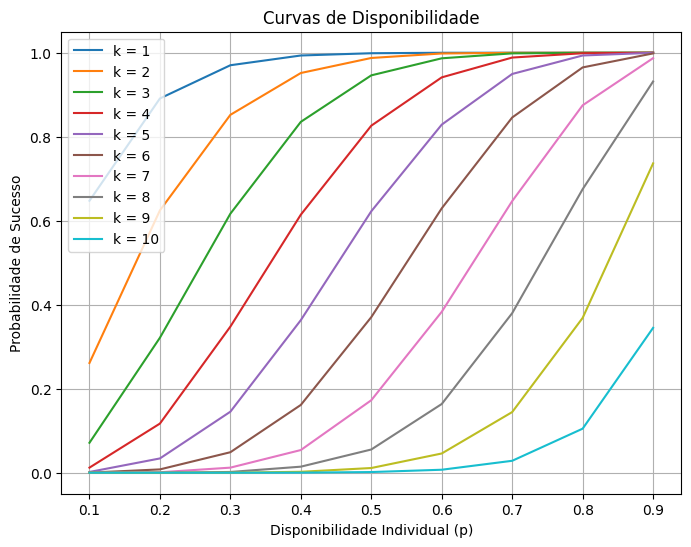

In [9]:
visualize.plot_availability_curves()

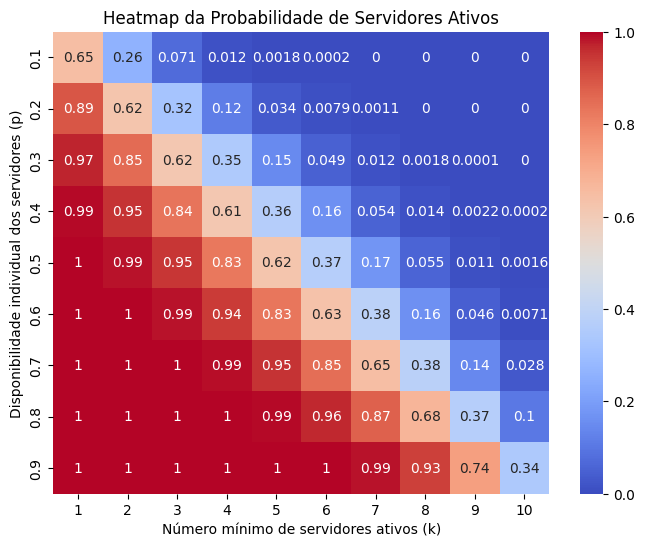

In [10]:
visualize.plot_heatmap()

In [13]:
recorte = op.get_slice("7-10", "500-900")
visu_slice = SimulatorVisualizer(recorte)

[6 7 8 9]
[4 5 6 7 8]


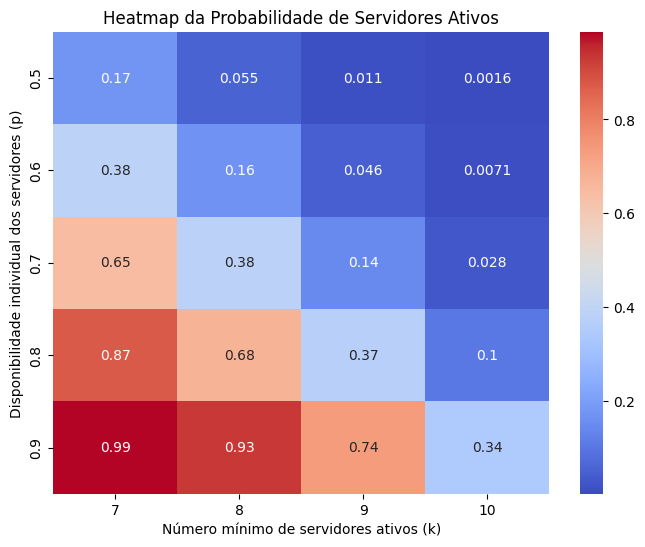

In [15]:
visu_slice.plot_heatmap()